# Data Science Partner – L6 – Case Study
## Data

We have collected an historical series of weather data collected from DarkSky API
Data contains a series of features, some are categorical, some continuous.

## Objective
We want to predict the event of rain using the data provided
In the presentation we would like you to think about how you would sell this idea as an ongoing commitment to a travel client with Digitas and how this could be used to relate to their business critical KPIs

## Tasks
We expect the following steps to be 
- data quality
- outlier / missing
- feature distribution
- feature transformation
- dimension reduction
- target variable definition
- feature importance
- model selection
- prediction - scoring


# Duration
It’s expected that the modeling element will take 4 hrs plus a presentation and write up

# Evaluation

The quality of the final report will be evaluated together with the arguments to the discussion and data visualization. 
Please state your reasons for choosing a particular model / method

# Delivery

Powerpoint presentation of process to achieve the Tasks in the tasks section as well as the sales pitch as mentioned in the objective section.
Please submit code and comments used for the ETL, cleansing and modeling stages etc in either Python or R.



## Reading the data

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.preprocessing import OneHotEncoder
    

class MyEncoder(BaseEstimator, TransformerMixin):

    def __init__(self, col_to_transform):
        self.col_to_transform = col_to_transform
        self.ohe = OneHotEncoder(sparse=False)

    def transform(self, X):
        
        #  remove the first column
        transformed = self.ohe.fit_transform(X[self.col_to_transform])[:,:-1]
        col_names = self.ohe.get_feature_names(self.col_to_transform)[1:]

        X[col_names] = transformed
        X.drop(columns=self.col_to_transform, inplace=True)

        return X

    def fit(self, X, y=None, **fit_params):
        #  remove the first column
        self.ohe.fit(X[self.col_to_transform])
        
        return self

    
def z_score(df):
    return ((df - df.mean())/df.std(ddof=0))
    
    
plt.style.use('ggplot')
width, height = 15, 10
matplotlib.rcParams['figure.figsize'] = [width, height]


In [43]:
raw_data = pd.read_csv('weather_h.csv', parse_dates=True, index_col='time')
raw_data.index = pd.to_datetime(raw_data.index, unit='s')

raw_data

,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,windGust,...,uvIndex,visibility,precipType,precipAccumulation,pressure,ozone,isocal,id_poi,hour,day
time,,,,,,,,,,,,,,,,,,,,,
2016-12-31 23:00:00,Overcast,cloudy,0.0000,0.00,3.072222,0.161111,34.69,0.89,6.79,9.05,...,0.0,6.216,NaN,NaN,NaN,NaN,52-07T00,1,0,2017-01-01
2017-01-01 00:00:00,Mostly Cloudy,partly-cloudy-night,0.0000,0.00,3.238889,0.561111,34.20,0.87,6.24,9.05,...,0.0,5.173,NaN,NaN,NaN,NaN,52-07T01,1,1,2017-01-01
2017-01-01 01:00:00,Mostly Cloudy,partly-cloudy-night,0.0000,0.00,2.938889,-0.050000,32.87,0.84,6.94,10.44,...,0.0,4.830,NaN,NaN,NaN,NaN,52-07T02,1,2,2017-01-01
2017-01-01 02:00:00,Overcast,cloudy,0.0000,0.00,2.738889,-0.366667,32.46,0.84,7.17,9.90,...,0.0,6.216,NaN,NaN,NaN,NaN,52-07T03,1,3,2017-01-01
2017-01-01 03:00:00,Overcast,cloudy,0.0000,0.00,2.838889,-0.144444,32.62,0.84,6.86,7.66,...,0.0,6.216,NaN,NaN,NaN,NaN,52-07T04,1,4,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00,Mostly Cloudy,partly-cloudy-night,0.0027,0.10,6.616667,3.805556,42.94,0.96,9.10,15.96,...,0.0,2.058,rain,NaN,1029.72,298.4,01-01T19,1,19,2018-12-31
2018-12-31 19:00:00,Mostly Cloudy,partly-cloudy-night,0.0033,0.11,6.611111,3.922222,42.97,0.96,8.60,18.24,...,0.0,2.080,rain,NaN,1029.34,297.4,01-01T20,1,20,2018-12-31
2018-12-31 20:00:00,Foggy,fog,0.0035,0.11,7.044444,4.450000,43.98,0.97,8.61,20.78,...,0.0,1.605,rain,NaN,1028.96,296.8,01-01T21,1,21,2018-12-31


## Data quality

A quick summary of the data:

In [44]:
print(raw_data.columns)
raw_data.describe()

Index(['summary', 'icon', 'precipIntensity', 'precipProbability',
       'temperature', 'apparentTemperature', 'dewPoint', 'humidity',
       'windSpeed', 'windGust', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility', 'precipType', 'precipAccumulation', 'pressure', 'ozone',
       'isocal', 'id_poi', 'hour', 'day'],
      dtype='object')


,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipAccumulation,pressure,ozone,id_poi,hour
count,10980.000000,10980.000000,11972.000000,11972.000000,11972.000000,11972.000000,11966.000000,10998.000000,11836.000000,8935.000000,10596.000000,11963.000000,69.000000,2220.000000,2220.000000,11972.0,11972.000000
mean,0.001589,0.059299,10.562512,9.497803,42.925616,0.762709,6.321073,10.424684,198.216881,0.643961,0.619102,5.805698,0.022172,1018.794104,296.817568,1.0,11.497411
std,0.008051,0.166139,7.563293,8.643471,10.640963,0.163704,3.852841,7.207057,83.723333,0.255871,1.319999,1.144890,0.032754,8.694275,25.724094,0.0,6.922817
min,0.000000,0.000000,-9.788889,-12.811111,11.280000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.079000,0.001300,988.310000,242.700000,1.0,0.000000
25%,0.000000,0.000000,4.766667,2.366667,34.917500,0.660000,3.600000,5.222500,132.000000,0.570000,0.000000,6.216000,0.003100,1013.875000,278.300000,1.0,5.000000
50%,0.000000,0.000000,10.147222,10.147222,43.580000,0.810000,5.670000,8.990000,219.000000,0.750000,0.000000,6.216000,0.008000,1019.385000,294.950000,1.0,11.000000
75%,0.000000,0.000000,16.116667,16.116667,50.792500,0.890000,8.360000,13.557500,265.000000,0.750000,0.000000,6.216000,0.021900,1025.252500,316.450000,1.0,17.000000
max,0.217400,0.850000,33.983333,33.983333,69.880000,1.000000,27.080000,45.260000,359.000000,1.000000,8.000000,10.000000,0.153200,1039.150000,361.300000,1.0,23.000000


### Checking the dates

There are three variables for dates. These dates are not consistent and there is a big gap in the middle of our time line.

We will have to:
    
- Check if there are missing dates.
- Check is there is the date/time are aligned and consistent
- Visualize the data

In [45]:
unique_days = pd.date_range(raw_data.index.min(), raw_data.index.max(), freq='d')
print('Unique number of days', len(unique_days))
raw_data.day.describe()


Unique number of days 730


count          11972
unique           499
top       2017-10-29
freq              25
Name: day, dtype: object

In [46]:
# Checking if we are missing any date
all_hours = pd.date_range(raw_data.index.min(), raw_data.index.max(), freq='h')
assert len(raw_data.index) == len(all_hours) , f'The index has a different numbers of items. {len(raw_data.index)} vs {len(all_hours)}, we are missing { (len(all_hours)-len(raw_data.index)) / len(all_hours)*100} % of the dates.'

AssertionError: The index has a different numbers of items. 11972 vs 17520, we are missing 31.666666666666664 % of the dates.

### The variable  isocal  

The variable isocal likely represent a calendar, but is slightly inconsistent. The last day of the year in the first time series correspond to 52-07 while in the second ts is 01-01

It seems the format is: "week"-"day of the week"T"hour".

Because the time of the day influence the temperature and therefore the weather, we are more interested in the local time of the recording, so we will use the other two sources.

### Visualizing the missing dates

There are two different timezones, probably related to summer/winter time.

In [47]:
date_data =  raw_data[['hour', 'day']].copy()
raw_data.drop(columns=['day', 'hour', 'isocal'], inplace=True)
from datetime import timedelta
from datetime import datetime
import numpy as np

def transform_to_datetime(string):
    """
    Transform Values into strings and 
    prints the errors
    """
    try:
        return pd.to_datetime(string)
    except Exception as e:
        print(f'Not a datetime {string}')
        return np.datetime64('NaT')

date_data.day = date_data.day.apply(transform_to_datetime)

date_data['time_diff'] = date_data.index - (date_data.day + date_data.hour.apply(lambda x: timedelta(hours=x)))
# in hours
date_data['time_diff'] = date_data['time_diff'].apply(lambda x: x.total_seconds()/3600)

date_data['time_diff'].value_counts()


-2.0    6862
-1.0    5110
Name: time_diff, dtype: int64

We are missing days between 2017-12-31 23:00:00 and 2018-08-18 23:00:00


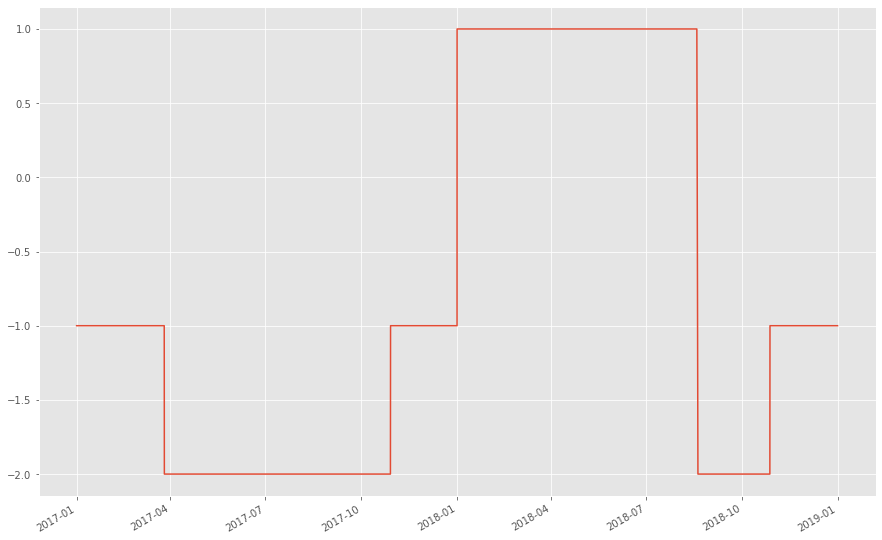

In [48]:
# adding the missing days

all_days = pd.DataFrame(index=unique_days)
all_days = all_days.join(date_data, how='outer').fillna(int(1))
all_days['time_diff'].plot()

missing_days = all_days[all_days.time_diff==1]

print(f'We are missing days between {missing_days.index.min()} and {missing_days.index.max()}')

quite a few variables are available only in the second time series. For this iteration we will not use them.

<AxesSubplot:xlabel='time'>

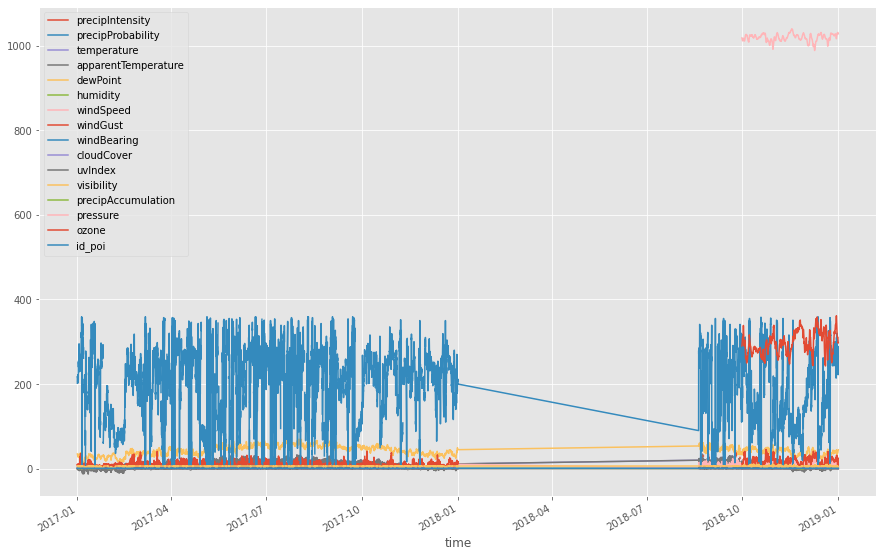

In [49]:
raw_data.plot()

In [50]:
# Check the percentage of missing data globally
count_missing_values = (raw_data.isna().sum()/raw_data.isna().count()).sort_values(ascending=False)
missing_values_to_check = count_missing_values[count_missing_values>0]

missing_values_to_check

precipAccumulation    0.994237
pressure              0.814567
ozone                 0.814567
precipType            0.748329
cloudCover            0.253675
uvIndex               0.114935
precipIntensity       0.082860
precipProbability     0.082860
windGust              0.081356
windBearing           0.011360
visibility            0.000752
windSpeed             0.000501
dtype: float64

I will assume that if the minimum value of a column is close to zero for that column a missing value represents a zero.

In a normal setting I would get more information on how the variable was collected.

In [51]:
# It seems the last few months (after Oct 2018) have more data
# Check the percentage of missing data in tha last few months
raw_data_latest = raw_data[raw_data.index<datetime(2018, 1, 1)]
count_missing_values_latest = (raw_data_latest.isna().sum()/raw_data_latest.isna().count()).sort_values(ascending=False)
missing_values_to_check_latest = count_missing_values_latest[count_missing_values_latest>0]

missing_values_to_check_latest

pressure              1.000000
ozone                 1.000000
precipAccumulation    0.994749
precipType            0.870091
cloudCover            0.277740
uvIndex               0.125114
windBearing           0.014840
windGust              0.001484
dtype: float64

Ozone and pressure  have only values after October 2018. For the first iteration I will not consider them. 

In [52]:
# Columns available only in the last few months

data = raw_data.drop(['ozone', 'pressure'], axis=1)
data.columns

Index(['summary', 'icon', 'precipIntensity', 'precipProbability',
       'temperature', 'apparentTemperature', 'dewPoint', 'humidity',
       'windSpeed', 'windGust', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility', 'precipType', 'precipAccumulation', 'id_poi'],
      dtype='object')

When the minimum values is different than zero, but close to it, I can assume that the missing value means represent zero. 
In a normal setting I would ask how the data was collected.

In [53]:


raw_data.precipAccumulation.dropna().min()


raw_data[missing_values_to_check.index].min()

precipAccumulation      0.0013
pressure              988.3100
ozone                 242.7000
cloudCover              0.0000
uvIndex                 0.0000
precipIntensity         0.0000
precipProbability       0.0000
windGust                0.0000
windBearing             0.0000
visibility              0.0790
windSpeed               0.0000
dtype: float64

I could consider the two time series as two different problems, as they clearly behave in different ways, but for the initial engagement I will consider them as the only one.

## Outliers

A boxplot can give us an indication about the outliers, but we will also go through  each variable.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'precipIntensity'),
  Text(2, 0, 'precipProbability'),
  Text(3, 0, 'temperature'),
  Text(4, 0, 'apparentTemperature'),
  Text(5, 0, 'dewPoint'),
  Text(6, 0, 'humidity'),
  Text(7, 0, 'windSpeed'),
  Text(8, 0, 'windGust'),
  Text(9, 0, 'windBearing'),
  Text(10, 0, 'cloudCover'),
  Text(11, 0, 'uvIndex'),
  Text(12, 0, 'visibility'),
  Text(13, 0, 'precipAccumulation'),
  Text(14, 0, 'pressure'),
  Text(15, 0, 'ozone'),
  Text(16, 0, 'id_poi')])

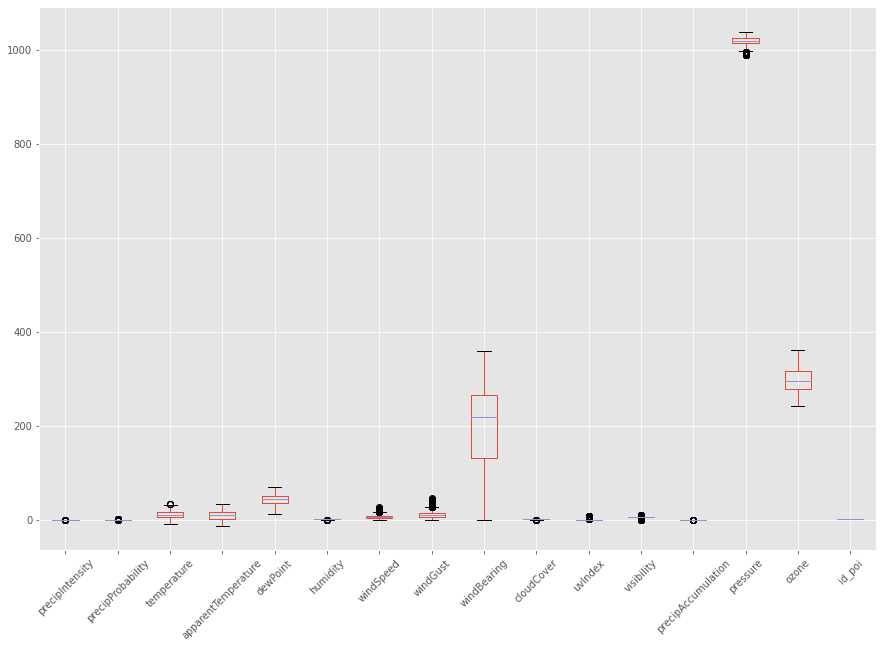

In [54]:
raw_data.plot(kind='box')
plt.xticks(rotation=45)

In [55]:
I want to see which columns has outliers.


SyntaxError: invalid syntax (<ipython-input-55-1b1dc4085128>, line 1)

In [56]:
from scipy import stats
import numpy as np
outlier_threshold = 3
std = data.describe()[data.describe().index=='std'].to_dict()
# outlier_columns = 
# data['is_outlier'] =  (data > data.median() + data.std()*3) | (data < data.median() - data.std()*3)

is_outlier = (np.abs(stats.zscore(data._get_numeric_data())) < 0).all(axis=1)
data[is_outlier]
stats.zscore(data._get_numeric_data())


/Users/leonardodemarchi/opt/anaconda3/envs/vava/lib/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


array([[        nan,         nan, -0.99038911, ...,         nan,
                nan,         nan],
       [        nan,         nan, -0.96835193, ...,         nan,
                nan,         nan],
       [        nan,         nan, -1.00801885, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan, -0.4651697 , ...,         nan,
                nan,         nan],
       [        nan,         nan, -0.46590427, ...,         nan,
                nan,         nan],
       [        nan,         nan, -0.33147748, ...,         nan,
                nan,         nan]])

In [57]:

cols = data._get_numeric_data().columns
non_numeric_cols = set(data.columns) - set(cols)

is_outlier = data[cols].apply(stats.zscore)

is_outlier
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1

# data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
# data


,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipAccumulation,id_poi
time,,,,,,,,,,,,,,
2016-12-31 23:00:00,NaN,NaN,-0.990389,-1.080247,-0.773986,0.777601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:00:00,NaN,NaN,-0.968352,-1.033967,-0.820037,0.655425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,NaN,NaN,-1.008019,-1.104672,-0.945031,0.472159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,NaN,NaN,-1.034463,-1.141310,-0.983563,0.472159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 03:00:00,NaN,NaN,-1.021241,-1.115599,-0.968526,0.472159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00,NaN,NaN,-0.521732,-0.658588,0.001352,1.205220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 19:00:00,NaN,NaN,-0.522466,-0.645090,0.004171,1.205220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 20:00:00,NaN,NaN,-0.465170,-0.584026,0.099091,1.266308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Manually checking the outliers

In [58]:
print('Number of missing values:', sum(data['temperature'].isnull()))
data[np.abs(z_score(data[cols])['temperature'])>3]

Number of missing values: 0


,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,id_poi
time,,,,,,,,,,,,,,,,,
2018-08-23 13:00:00,Clear,clear-day,NaN,NaN,33.433333,33.433333,49.21,0.23,10.91,NaN,178.0,NaN,NaN,6.216,rain,NaN,1
2018-08-23 14:00:00,Clear,clear-day,NaN,NaN,33.433333,33.433333,49.21,0.23,9.31,NaN,205.0,NaN,NaN,6.216,rain,NaN,1
2018-08-23 15:00:00,Clear,clear-day,NaN,NaN,33.983333,33.983333,49.21,0.22,10.91,NaN,238.0,NaN,NaN,6.216,rain,NaN,1
2018-08-23 16:00:00,Clear,clear-day,NaN,NaN,33.433333,33.433333,48.42,0.22,9.44,NaN,259.0,NaN,NaN,6.216,rain,NaN,1


In [59]:
print('Number of missing values:', sum(data['apparentTemperature'].isnull()))
data[np.abs(z_score(data[cols])['apparentTemperature'])>3]

Number of missing values: 0


,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,id_poi
time,,,,,,,,,,,,,,,,,


In [60]:
#  '', 'humidity', 'hour'
print('Number of missing values:', sum(data['dewPoint'].isnull()))

data[np.abs(z_score(data[cols])['dewPoint'])>3]

Number of missing values: 0


,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,id_poi
time,,,,,,,,,,,,,,,,,


In [61]:
def check_outliers(col):
    print('Number of missing values:', sum(data[col].isnull()))
    print(f'{col} outliers compared to the stats: min {data[col].min()} - mean: {data[col].mean() }- median: {data[col].median()} - max: {data[col].max()}')
    return data[np.abs(z_score(data[cols])[col])>3][col]


In [62]:
check_outliers('humidity')

Number of missing values: 0
humidity outliers compared to the stats: min 0.17 - mean: 0.7627088205813565- median: 0.81 - max: 1.0


time
2017-03-28 13:00:00    0.27
2017-03-28 14:00:00    0.26
2017-03-28 15:00:00    0.26
2017-03-28 16:00:00    0.24
2017-03-28 17:00:00    0.27
2017-05-28 13:00:00    0.27
2017-06-01 14:00:00    0.27
2017-06-02 11:00:00    0.26
2017-06-02 12:00:00    0.22
2017-06-02 13:00:00    0.19
2017-06-02 14:00:00    0.19
2017-06-02 15:00:00    0.17
2017-06-02 16:00:00    0.20
2017-06-02 17:00:00    0.23
2018-08-23 11:00:00    0.26
2018-08-23 12:00:00    0.27
2018-08-23 13:00:00    0.23
2018-08-23 14:00:00    0.23
2018-08-23 15:00:00    0.22
2018-08-23 16:00:00    0.22
2018-08-23 17:00:00    0.24
2018-09-09 12:00:00    0.27
2018-09-09 13:00:00    0.27
2018-09-09 14:00:00    0.27
2018-09-09 15:00:00    0.26
2018-09-09 16:00:00    0.27
2018-09-17 13:00:00    0.26
2018-09-17 14:00:00    0.25
2018-09-17 15:00:00    0.25
2018-09-17 16:00:00    0.26
2018-09-18 13:00:00    0.26
2018-09-18 14:00:00    0.26
2018-09-18 15:00:00    0.26
2018-09-18 16:00:00    0.23
2018-09-18 17:00:00    0.27
Name: humidity,

Number of missing values: 992
precipIntensity outliers compared to the stats: min 0.0 - mean: 0.0015892349726775955- median: 0.0 - max: 0.2174


<AxesSubplot:xlabel='time'>

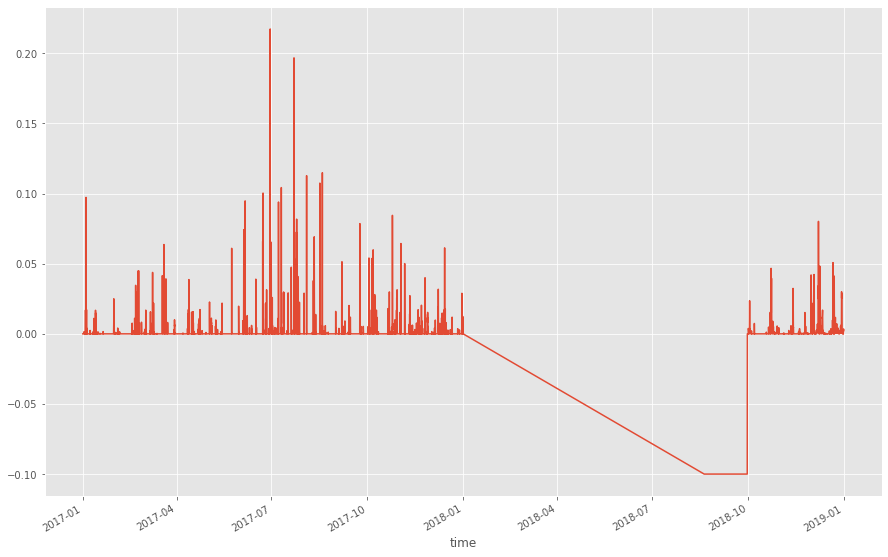

In [63]:
check_outliers('precipIntensity')
data['precipIntensity'].fillna(-0.1).plot()

Number of missing values: 992
precipProbability outliers compared to the stats: min 0.0 - mean: 0.05929872495446266- median: 0.0 - max: 0.85


<AxesSubplot:xlabel='time'>

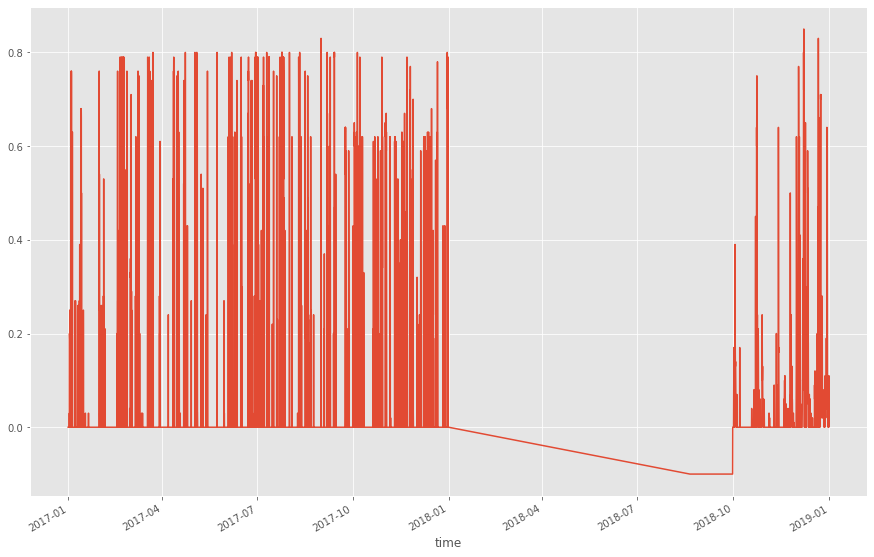

In [64]:
# '', '',
#        '', '', 'dewPoint', 'humidity',
#        'windSpeed', 'windGust', 'windBearing', 'cloudCover', 'uvIndex',
#        'visibility', 'precipType', 'precipAccumulation', 'isocal', 'id_poi',
#        'hour', 'day'],

check_outliers('precipProbability')
data['precipProbability'].fillna(-0.1).plot()

Number of missing values: 6
windSpeed outliers compared to the stats: min 0.0 - mean: 6.321073040280795- median: 5.67 - max: 27.08


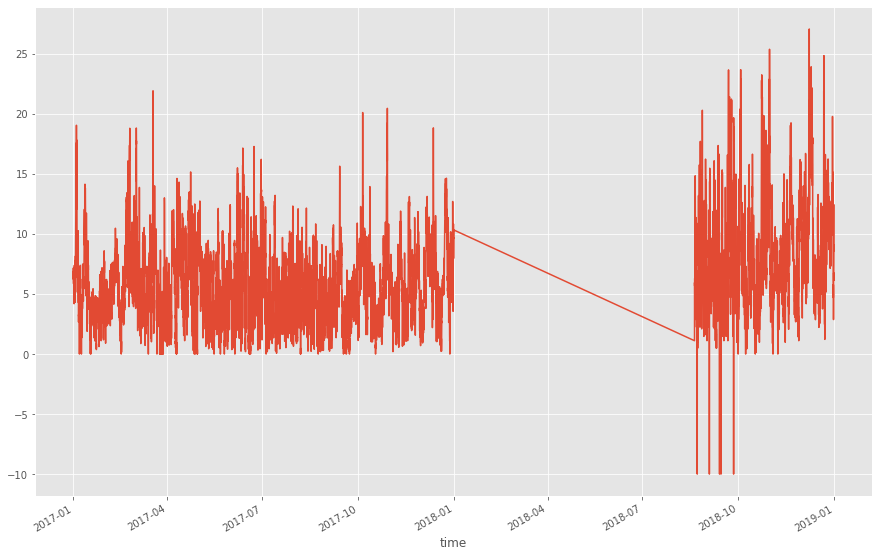

In [65]:
check_outliers('windSpeed')

data['windSpeed'].fillna(-10).plot()

data['windSpeed'] = data['windSpeed'].fillna(data['windSpeed'].interpolate())

Number of missing values: 136
windBearing outliers compared to the stats: min 0.0 - mean: 198.2168807029402- median: 219.0 - max: 359.0


time
2016-12-31 23:00:00    202.0
2017-01-01 00:00:00    211.0
2017-01-01 01:00:00    210.0
2017-01-01 02:00:00    218.0
2017-01-01 03:00:00    216.0
                       ...  
2018-12-31 18:00:00    240.0
2018-12-31 19:00:00    250.0
2018-12-31 20:00:00    255.0
2018-12-31 21:00:00    260.0
2018-12-31 22:00:00    265.0
Name: windBearing, Length: 11972, dtype: float64

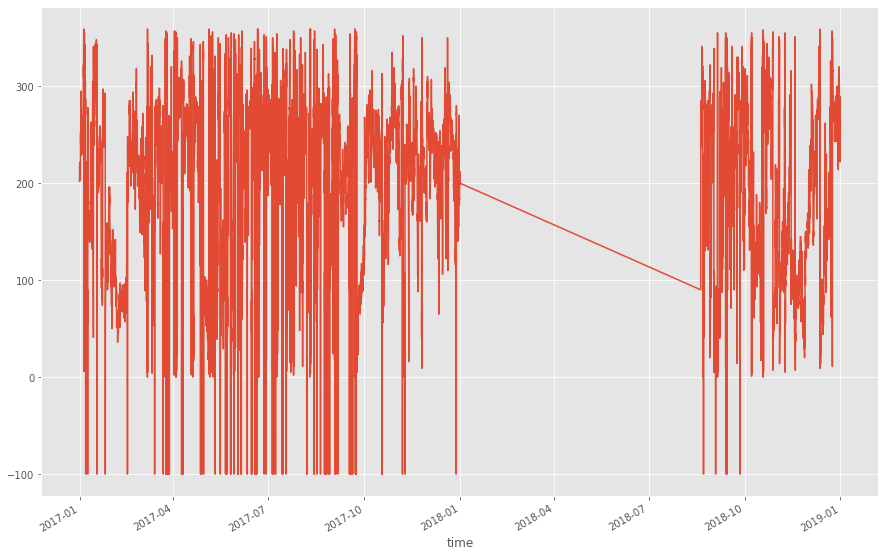

In [66]:
check_outliers('windBearing')

data['windBearing'].fillna(-100).plot()
data['windBearing'].fillna(data['windBearing'].interpolate())

Number of missing values: 3037
cloudCover outliers compared to the stats: min 0.0 - mean: 0.6439608282036934- median: 0.75 - max: 1.0


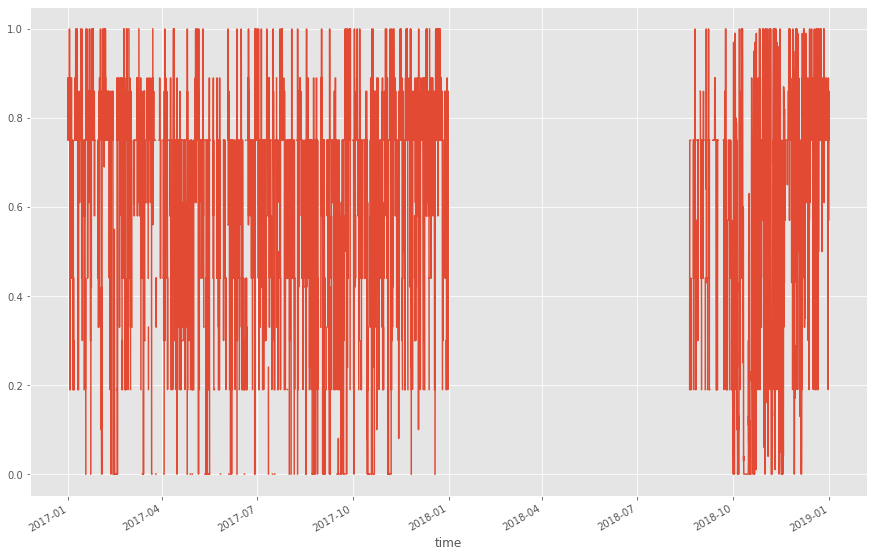

In [67]:
check_outliers('cloudCover')

data['cloudCover'].plot()

# Using a vale that I am sure we show that we are a missing value
data['cloudCover'] = data['cloudCover'].fillna(-1)

Number of missing values: 1376
uvIndex outliers compared to the stats: min 0.0 - mean: 0.6191015477538694- median: 0.0 - max: 8.0


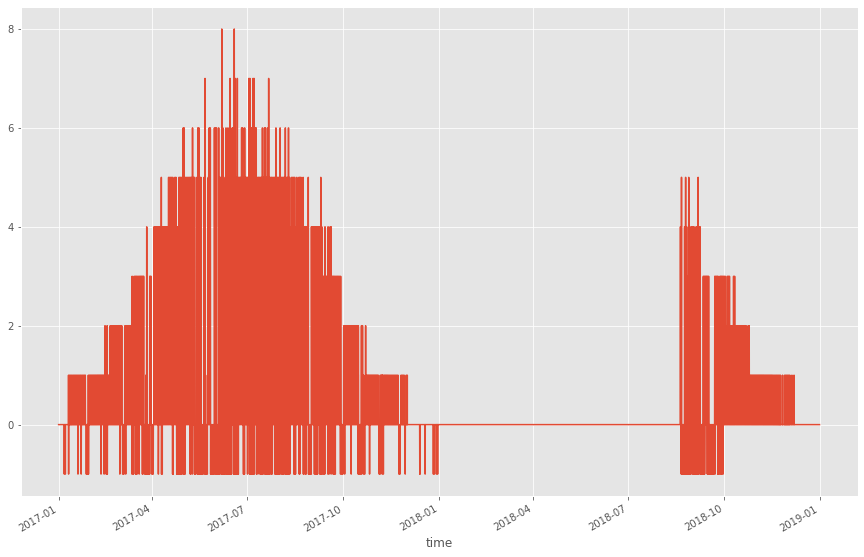

In [68]:
#   Ths 'UVindex' outliers seems suspiciously high, also in part of the year where I woudl not expect, like April

check_outliers('uvIndex')
data['uvIndex'].fillna(-1).plot()

data['uvIndex'] = data['uvIndex'].fillna(data['uvIndex'].interpolate())

Number of missing values: 9
visibility outliers compared to the stats: min 0.079 - mean: 5.8056983198194425- median: 6.216 - max: 10.0


<AxesSubplot:xlabel='time'>

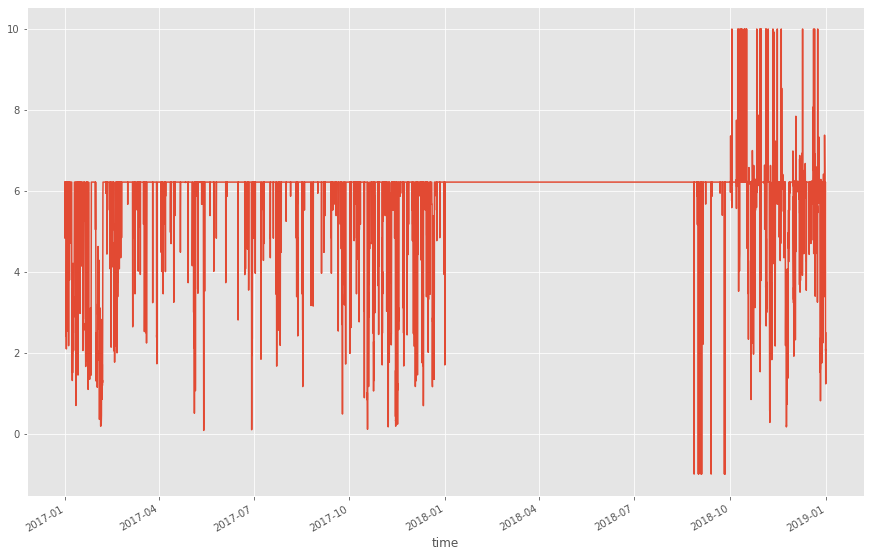

In [69]:
check_outliers('visibility')

data['visibility'].fillna(-1).plot()

Number of missing values: 11903
precipAccumulation outliers compared to the stats: min 0.0013 - mean: 0.022172463768115942- median: 0.008 - max: 0.1532


<AxesSubplot:xlabel='time'>

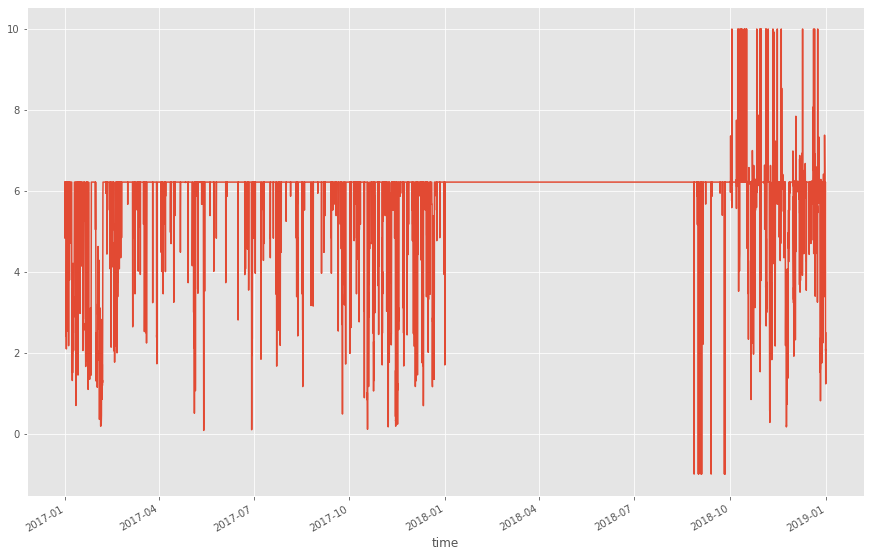

In [70]:
check_outliers('precipAccumulation')

data['visibility'].fillna(-1).plot()

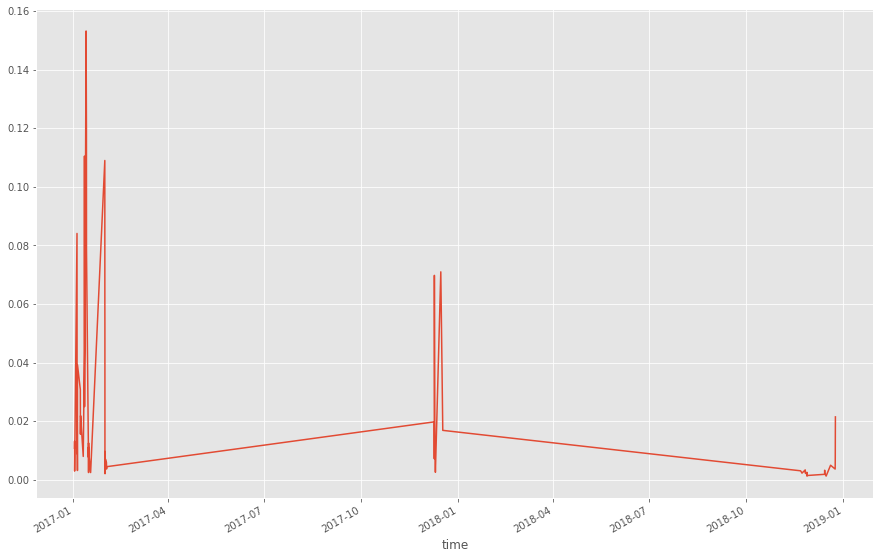

In [71]:
# The metric precipAccumulation seems quite rare and with a high frequency numbers, but there is nothing that clearly suggests
# it's not correct, migt be helpful to predict extreme events.
data['precipAccumulation'].dropna().plot()

data['precipAccumulation'] = data['precipAccumulation'].fillna(0)

## Feature distribution

Checking the feature distribution of "summary" we can see that we would like to have fewer classes, based on what is useful to predict for our business case.


<AxesSubplot:>

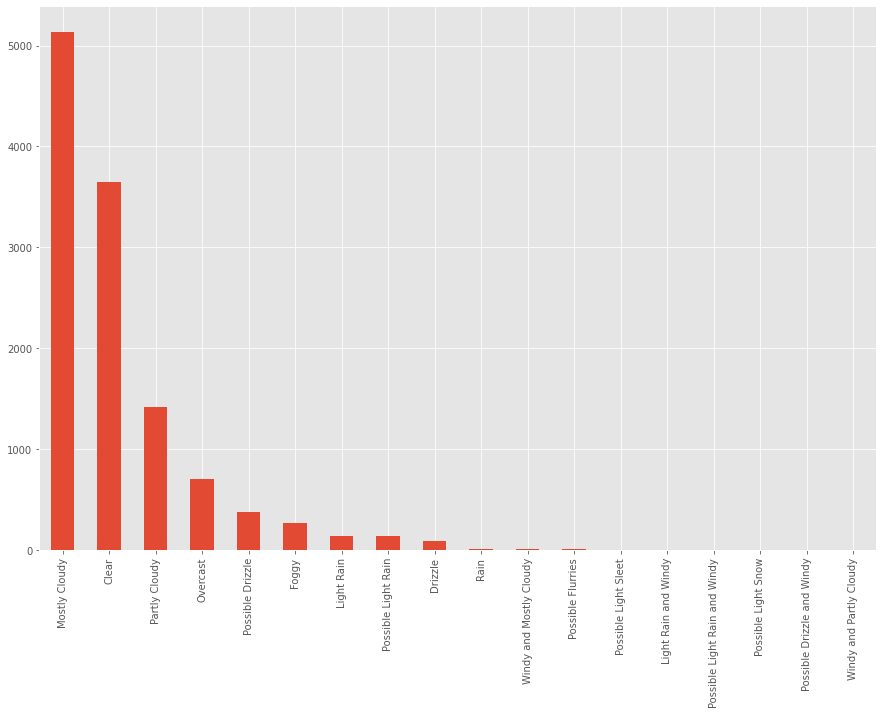

In [72]:
import seaborn as sns
plt.xticks(rotation=45)

order = data['summary'].value_counts()

order.plot(kind='bar')

<AxesSubplot:>

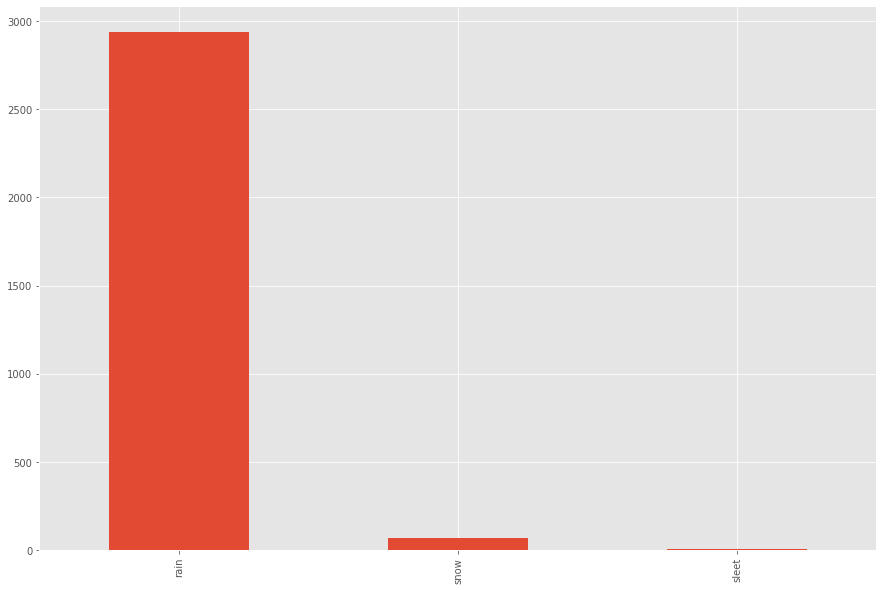

In [73]:
non_numeric_cols

order = data['precipType'].value_counts()

order.plot(kind='bar')

<AxesSubplot:>

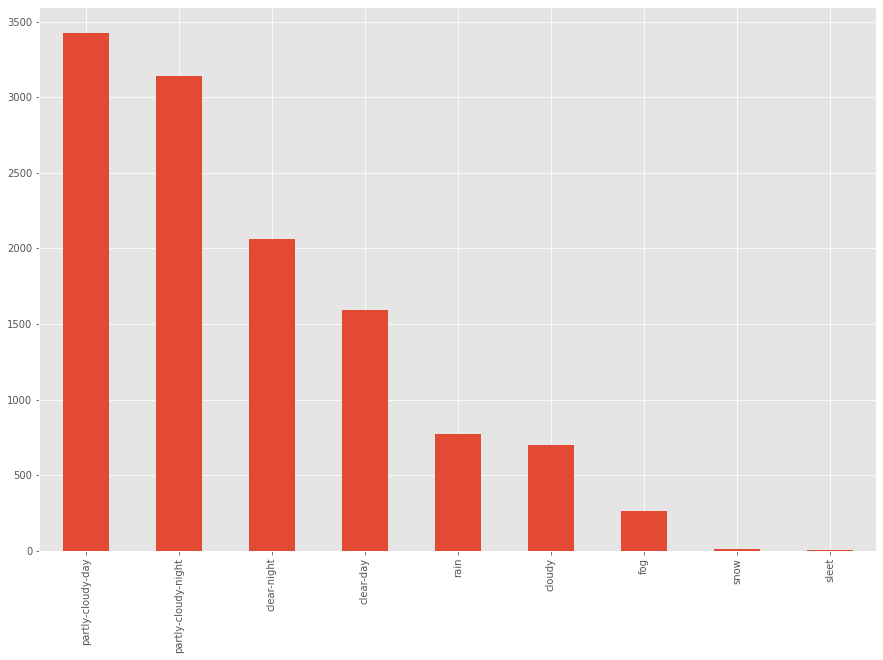

In [74]:
order = data['icon'].value_counts()

order.plot(kind='bar')

<AxesSubplot:xlabel='precipType,icon,summary'>

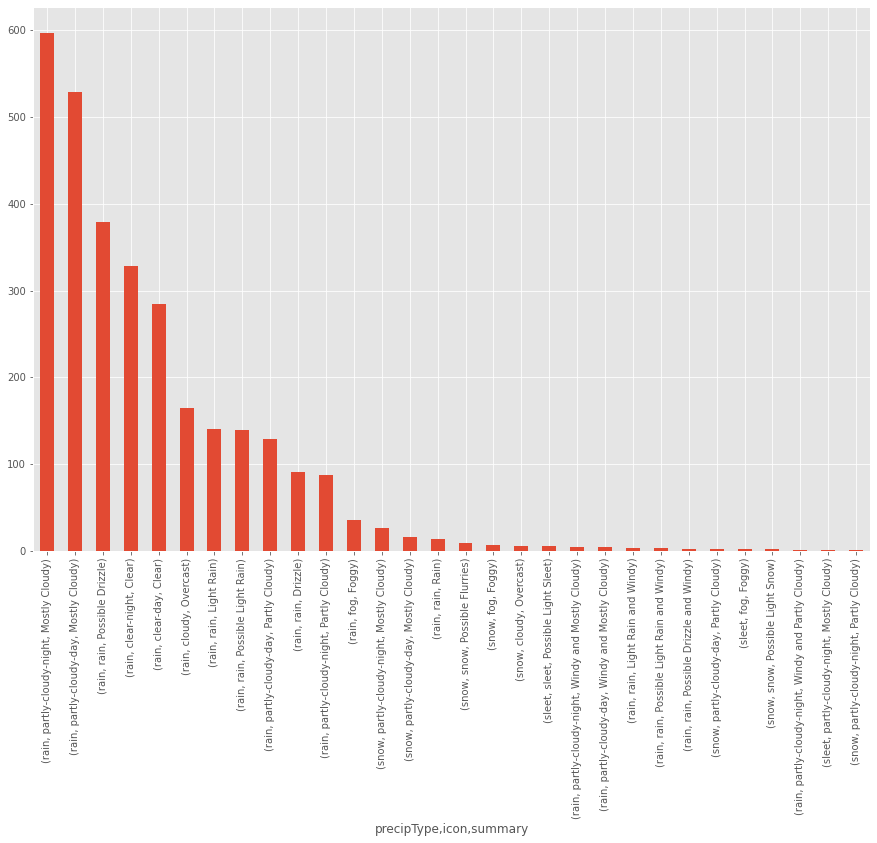

In [75]:
# data.apply(pd.Series.value_counts)

non_numeric_cols = [col for col in non_numeric_cols if col !='isocal']
raw_data.reset_index()[non_numeric_cols].value_counts().plot(kind='bar')

# .plot.bar()
# .apply(pd.Series.value_counts).plot(kind='bar')
# .apply(pd.Series.value_counts).plot(kind='bar')


In [76]:
# from sklearn.feature_selection import VarianceThreshold

# sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
# sel.fit_transform(data)

data

,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,id_poi
time,,,,,,,,,,,,,,,,,
2016-12-31 23:00:00,Overcast,cloudy,0.0000,0.00,3.072222,0.161111,34.69,0.89,6.79,9.05,202.0,0.89,0.0,6.216,NaN,0.0,1
2017-01-01 00:00:00,Mostly Cloudy,partly-cloudy-night,0.0000,0.00,3.238889,0.561111,34.20,0.87,6.24,9.05,211.0,0.75,0.0,5.173,NaN,0.0,1
2017-01-01 01:00:00,Mostly Cloudy,partly-cloudy-night,0.0000,0.00,2.938889,-0.050000,32.87,0.84,6.94,10.44,210.0,0.75,0.0,4.830,NaN,0.0,1
2017-01-01 02:00:00,Overcast,cloudy,0.0000,0.00,2.738889,-0.366667,32.46,0.84,7.17,9.90,218.0,0.89,0.0,6.216,NaN,0.0,1
2017-01-01 03:00:00,Overcast,cloudy,0.0000,0.00,2.838889,-0.144444,32.62,0.84,6.86,7.66,216.0,0.89,0.0,6.216,NaN,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00,Mostly Cloudy,partly-cloudy-night,0.0027,0.10,6.616667,3.805556,42.94,0.96,9.10,15.96,240.0,0.86,0.0,2.058,rain,0.0,1
2018-12-31 19:00:00,Mostly Cloudy,partly-cloudy-night,0.0033,0.11,6.611111,3.922222,42.97,0.96,8.60,18.24,250.0,0.75,0.0,2.080,rain,0.0,1
2018-12-31 20:00:00,Foggy,fog,0.0035,0.11,7.044444,4.450000,43.98,0.97,8.61,20.78,255.0,0.75,0.0,1.605,rain,0.0,1


In [77]:
def is_rain(x):
    if x == 'rain' or x == 'sleet' or x == 'snow':
        return True
    return False

data.precipType = data.precipType.apply(lambda x: is_rain(x))

cat_features = ['summary', 'icon']    

fut_data = data.copy()
try:
    
    enc = MyEncoder(cat_features)
    data = enc.transform(data)
except Exception as e:
    print(cat_features, e, 'already dropped')
data

data = data.resample('4h').sum()
data = data.rename(columns={'precipType':'n_hours_with_rain'})

data.n_hours_with_rain

time
2016-12-31 20:00:00    0
2017-01-01 00:00:00    0
2017-01-01 04:00:00    0
2017-01-01 08:00:00    0
2017-01-01 12:00:00    0
                      ..
2018-12-31 04:00:00    0
2018-12-31 08:00:00    3
2018-12-31 12:00:00    1
2018-12-31 16:00:00    4
2018-12-31 20:00:00    3
Freq: 4H, Name: n_hours_with_rain, Length: 4381, dtype: int64

Visualizing the number of hours of rain for each day.

<AxesSubplot:xlabel='time'>

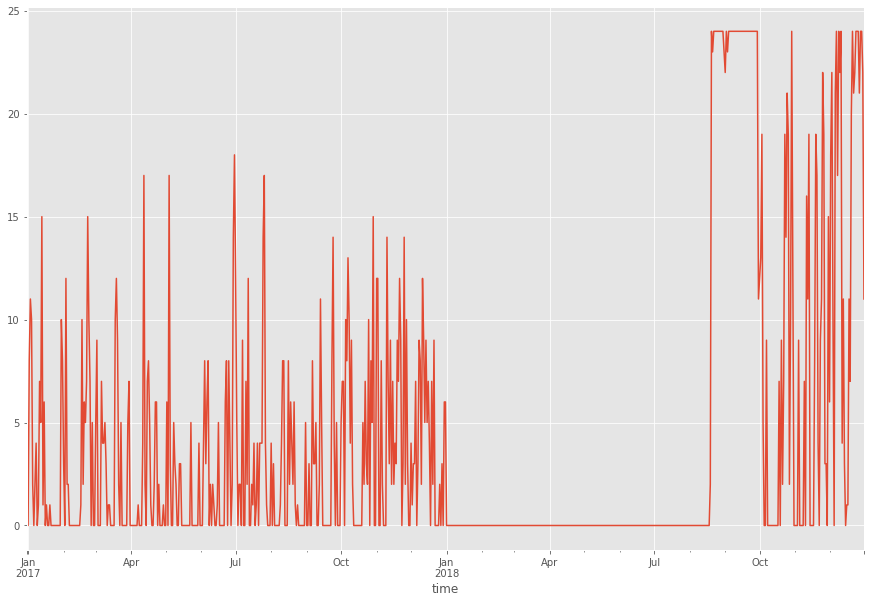

In [78]:
data.resample('1d').sum().n_hours_with_rain.plot()


In [80]:
data.n_hours_with_rain

time
2016-12-31 20:00:00    0
2017-01-01 00:00:00    0
2017-01-01 04:00:00    0
2017-01-01 08:00:00    0
2017-01-01 12:00:00    0
                      ..
2018-12-31 04:00:00    0
2018-12-31 08:00:00    3
2018-12-31 12:00:00    1
2018-12-31 16:00:00    4
2018-12-31 20:00:00    3
Freq: 4H, Name: n_hours_with_rain, Length: 4381, dtype: int64

### Feature transformation

In [81]:

data['rained'] = data.n_hours_with_rain.apply(lambda x: x>0)

# past_data_names = [col+'_prev_hour' for col in data.columns]
# past_data = data.shift(1).copy()

In [82]:
x = data.copy()

In [83]:
data.columns

Index(['precipIntensity', 'precipProbability', 'temperature',
       'apparentTemperature', 'dewPoint', 'humidity', 'windSpeed', 'windGust',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility',
       'n_hours_with_rain', 'precipAccumulation', 'id_poi', 'summary_Drizzle',
       'summary_Foggy', 'summary_Light Rain', 'summary_Light Rain and Windy',
       'summary_Mostly Cloudy', 'summary_Overcast', 'summary_Partly Cloudy',
       'summary_Possible Drizzle', 'summary_Possible Drizzle and Windy',
       'summary_Possible Flurries', 'summary_Possible Light Rain',
       'summary_Possible Light Rain and Windy', 'summary_Possible Light Sleet',
       'summary_Possible Light Snow', 'summary_Rain',
       'summary_Windy and Mostly Cloudy', 'summary_Windy and Partly Cloudy',
       'icon_clear-day', 'icon_clear-night', 'icon_cloudy', 'icon_fog',
       'icon_partly-cloudy-day', 'icon_partly-cloudy-night', 'icon_rain',
       'icon_sleet', 'icon_snow', 'rained'],
      dtype='object')

## Feature Transformation

It seems clear that the past is very important to predict if it's going to rain so I will add the past day to each row and also one-hot-encode the categorical features.


# Target variable definition


To define the variable I would need to have a busines case, also we only know that we are dealing with a generic "travel client". 

I immagine the main KPIs for this type of business is reducing costs and increase revenues. 

One of the initial project could be to predict the next hour weather so they can suggest to our clients alternative activities.

For example, if we predict rain for the next hour and we konw 



As the task si generic I can start with predicting if there 



<AxesSubplot:xlabel='time'>

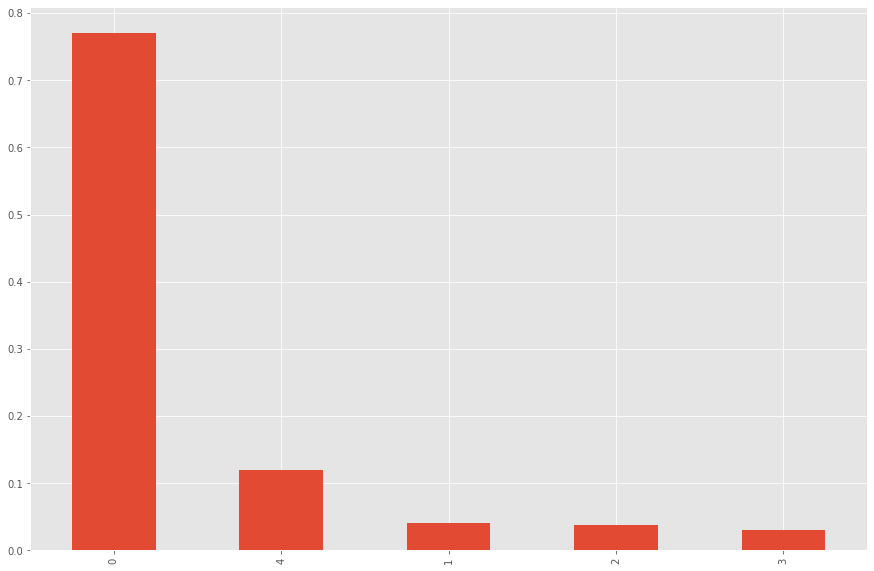

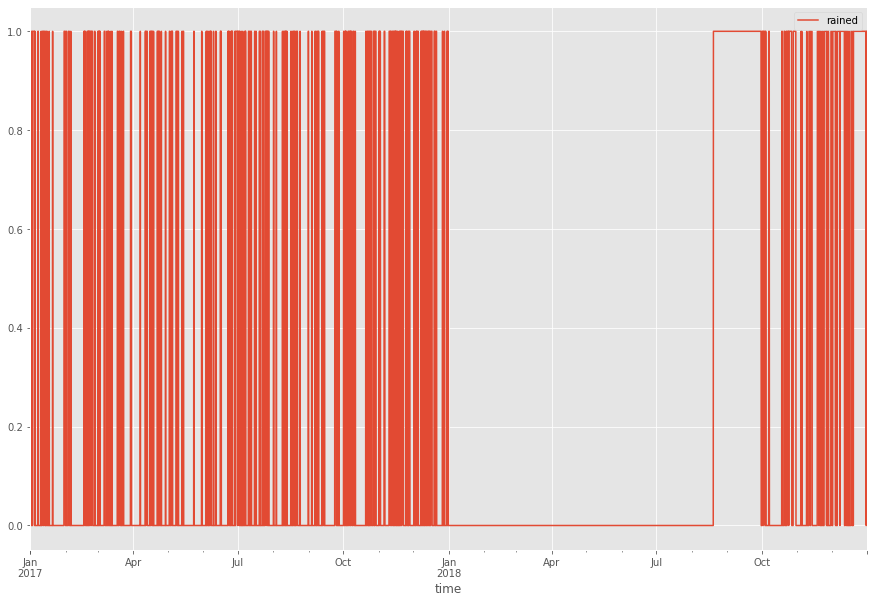

In [84]:
# d_x = x.resample('D')
# d_x.sum()
x['rained'] = data.n_hours_with_rain.apply(lambda x: x>0)
x.n_hours_with_rain.value_counts(normalize=True).plot(kind='bar')
x[['rained']].astype(int).plot()

<AxesSubplot:>

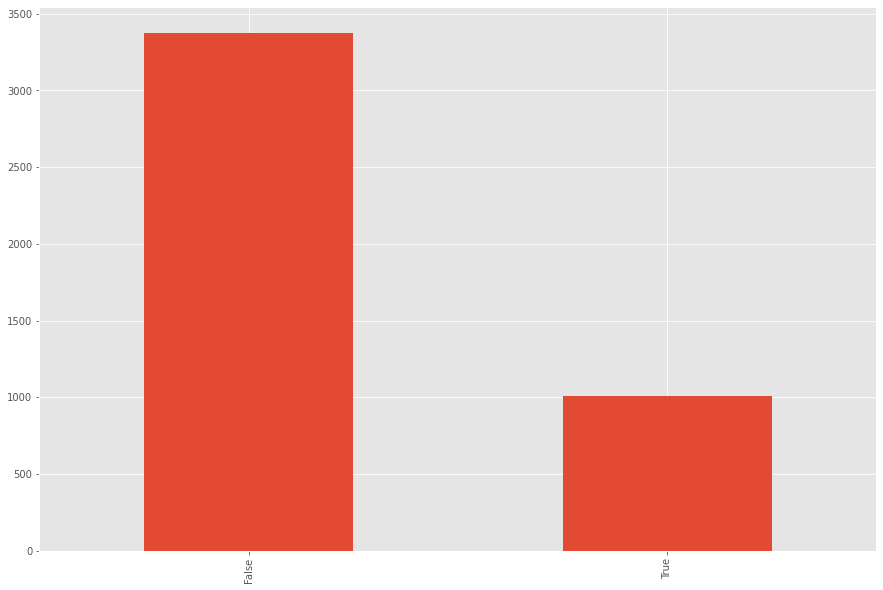

In [85]:
x.rained.value_counts().plot(kind='bar')

In [86]:
y = x.rained.shift(-1)[:-1]
y = y.astype('int')

try:
    x.drop(columns = ['y'], inplace=True)
except Exception as e:
    print('y already dropped')
# y = data[1:].precipType.apply(is_rain).shift(1)[1:]

#  adding shift i get teh label unknown
# x[x.isna().any(axis=1)]

X = x.fillna(0)[:-1]
# [:'2017-12-31']

# .iloc[1:]
y = y
# [:'2017-12-31']

X

y already dropped


,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,windGust,windBearing,cloudCover,...,icon_clear-day,icon_clear-night,icon_cloudy,icon_fog,icon_partly-cloudy-day,icon_partly-cloudy-night,icon_rain,icon_sleet,icon_snow,rained
time,,,,,,,,,,,,,,,,,,,,,
2016-12-31 20:00:00,0.0000,0.00,3.072222,1.611111e-01,34.69,0.89,6.79,9.05,202.0,0.89,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
2017-01-01 00:00:00,0.0000,0.00,11.755556,-2.053913e-15,132.15,3.39,27.21,37.05,855.0,3.28,...,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,False
2017-01-01 04:00:00,0.0000,0.00,9.105556,-2.261111e+00,127.44,3.37,24.74,32.91,849.0,3.42,...,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,False
2017-01-01 08:00:00,0.0000,0.00,7.138889,-5.111111e+00,120.19,3.26,26.01,34.18,850.0,3.00,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,False
2017-01-01 12:00:00,0.0000,0.00,13.911111,3.861111e+00,122.61,2.95,23.68,33.99,868.0,3.00,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 00:00:00,0.0000,0.00,12.438889,2.927778e+00,142.13,3.69,21.82,59.16,1132.0,1.18,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,False
2018-12-31 04:00:00,0.0000,0.00,14.605556,8.138889e+00,151.80,3.91,18.18,29.12,1081.0,3.56,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,False
2018-12-31 08:00:00,0.0006,0.20,20.311111,1.251111e+01,156.43,3.70,21.58,33.27,1094.0,2.96,...,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,True


## Feature importance

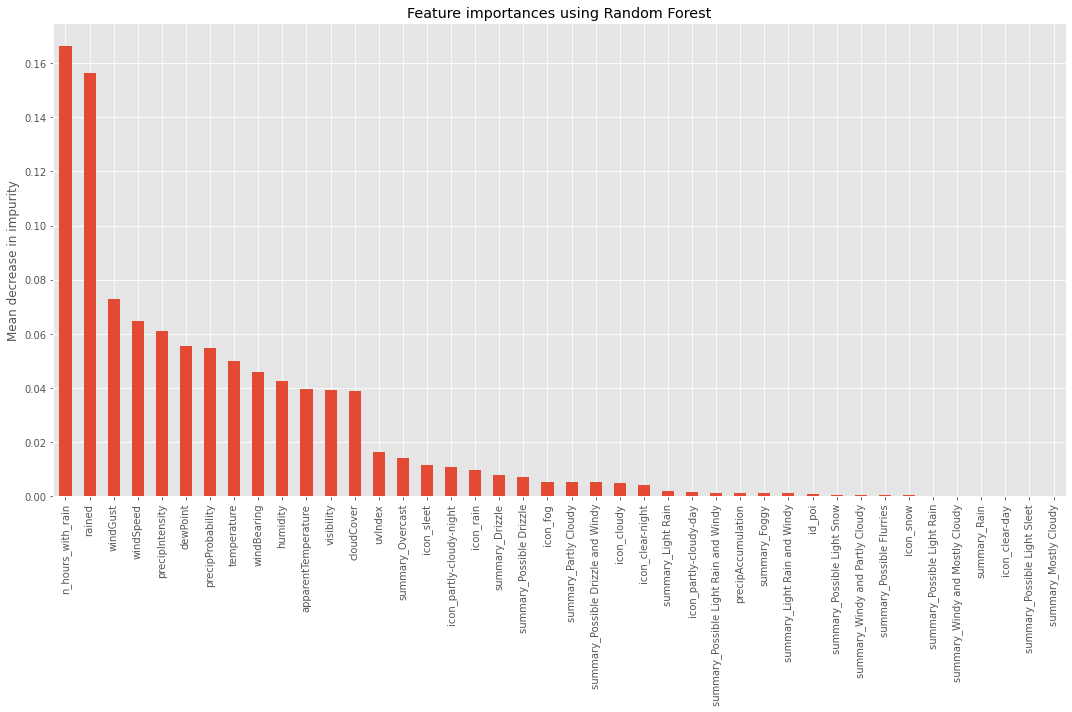

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=11)

from sklearn.ensemble import RandomForestClassifier

feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

forest_importances = pd.Series(forest.feature_importances_, index=x.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Random Forest")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Model Selection

### Random Forest

Random Forest is an easy method that can give quite good results without too much effort. Is nto Sibscetable to outliers and can provide a solid baselie for other models.

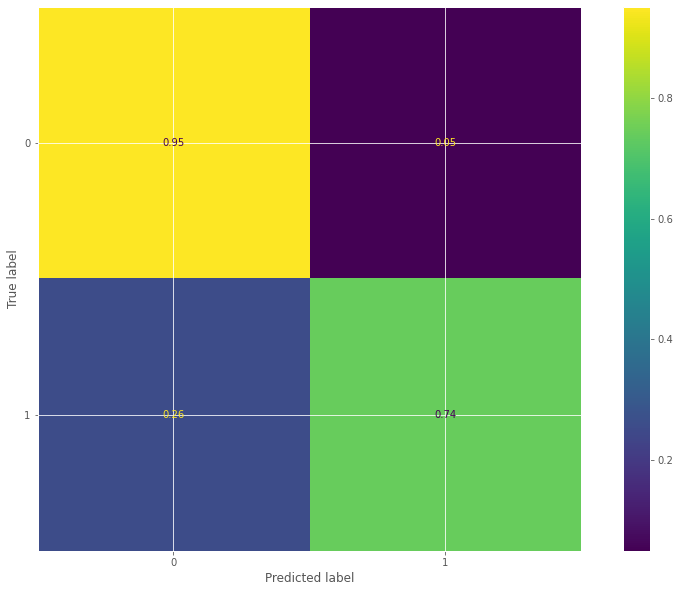

In [88]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion_matrix(y_test, forest.predict(X_test))

plot_confusion_matrix(forest, X_test, y_test, normalize='true')  
plt.show() 

Looking at the cross validation AUC scores:

In [90]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest, X.drop(columns=['precipAccumulation', 'id_poi']), y, cv=5, scoring='roc_auc')

print(scores, scores.mean())

[0.80834347 0.76049383 0.9417026  1.         0.96511885] 0.895131748664087


### Regression

We will now try with a regression model, LogisticRegression, as it's suitable for multicollinearity, which we  have due to the OneHotEncoder. We could use a PCA to reduce the effect but due to tie constrain we will skip that.

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter=5000)
scores = cross_val_score(reg, X.drop(columns=['precipAccumulation', 'id_poi']), y, cv=5, scoring='roc_auc')

print(scores, scores.mean())

[0.80612493 0.78494196 0.93901972 1.         0.96623549] 0.8992644186475033


# Predictions

To productionize it all the transformation should be done following scikit APIs, but for the sake of time I will exemplify it  it with just one. Fit and transform with the whole dataset are just to exemplify the use.

In [97]:
from sklearn.pipeline import make_pipeline


t = fut_data.copy()
    
pipeline = make_pipeline(LogisticRegression())
pipeline.fit(X.drop(columns=['precipAccumulation', 'id_poi']), y)
pipeline.predict(X.drop(columns=['precipAccumulation', 'id_poi']))


/Users/leonardodemarchi/opt/anaconda3/envs/vava/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, ..., 1, 0, 1])